In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats


import warnings
warnings.filterwarnings('ignore')

In [2]:
file_to_load = "data/us_treasury_yields_daily.csv"
original_data = pd.read_csv(file_to_load)

original_data.info()
original_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16299 entries, 0 to 16298
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    16299 non-null  object 
 1   US1M    5726 non-null   float64
 2   US3M    10702 non-null  float64
 3   US6M    10702 non-null  float64
 4   US1Y    15604 non-null  float64
 5   US2Y    12012 non-null  float64
 6   US3Y    15604 non-null  float64
 7   US5Y    15604 non-null  float64
 8   US7Y    13734 non-null  float64
 9   US10Y   15604 non-null  float64
 10  US20Y   13915 non-null  float64
 11  US30Y   11834 non-null  float64
dtypes: float64(11), object(1)
memory usage: 1.5+ MB


,date,US1M,US3M,US6M,US1Y,US2Y,US3Y,US5Y,US7Y,US10Y,US20Y,US30Y
0,1962-01-02,NaN,NaN,NaN,3.22,NaN,3.70,3.88,NaN,4.06,4.07,NaN
1,1962-01-03,NaN,NaN,NaN,3.24,NaN,3.70,3.87,NaN,4.03,4.07,NaN
2,1962-01-04,NaN,NaN,NaN,3.24,NaN,3.69,3.86,NaN,3.99,4.06,NaN
3,1962-01-05,NaN,NaN,NaN,3.26,NaN,3.71,3.89,NaN,4.02,4.07,NaN
4,1962-01-08,NaN,NaN,NaN,3.31,NaN,3.71,3.91,NaN,4.03,4.08,NaN


In [3]:
original_data.tail()

,date,US1M,US3M,US6M,US1Y,US2Y,US3Y,US5Y,US7Y,US10Y,US20Y,US30Y
16294,2024-06-17,5.45,5.52,5.39,5.11,4.75,4.50,4.30,4.28,4.28,4.52,4.40
16295,2024-06-18,5.40,5.50,5.37,5.09,4.69,4.43,4.24,4.22,4.22,4.47,4.36
16296,2024-06-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16297,2024-06-20,5.42,5.50,5.37,5.10,4.70,4.45,4.26,4.25,4.25,4.49,4.39
16298,2024-06-21,5.42,5.49,5.36,5.10,4.70,4.45,4.26,4.25,4.25,4.49,4.39


In [4]:
raw_data = original_data.copy()

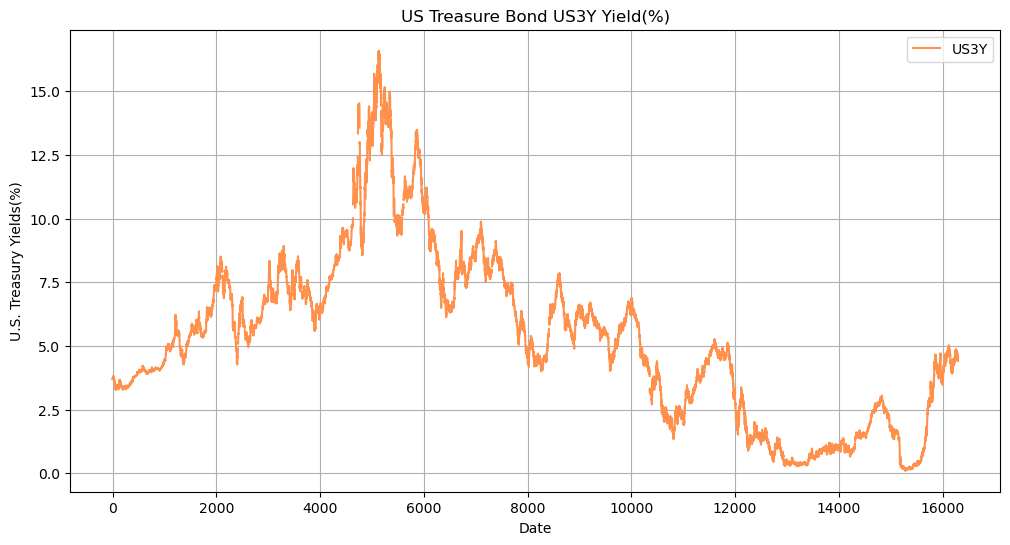

In [5]:
plt.figure(figsize=(12,6))
plt.plot(raw_data.index, raw_data.US3Y, label = 'US3Y', color = '#FF914D')
plt.title('US Treasure Bond US3Y Yield(%)')
plt.xlabel('Date')
plt.ylabel('U.S. Treasury Yields(%)')
plt.legend()
plt.grid(True)
plt.show()

# Data Preprocessing

## Data Cleaning

In [6]:
# convert date to datetime format
raw_data['date'] = pd.to_datetime(raw_data['date'])

# convert date column to index
data = raw_data.set_index('date').asfreq('d')

## Handling Missing Values

### Filling Missing Values Best Practice for Stock Data
1 Fill missing values before differencing, unless missingness is small and caused by differencing itself.
2 For non-trading days (weekends/holidays), decide whether to:
Forward fill (common for stock closing prices), or
Remove them entirely (if modeling only trading days).

In [7]:
data['US3Y'] = data['US3Y'].fillna(method='ffill')
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22817 entries, 1962-01-02 to 2024-06-21
Freq: D
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   US1M    5726 non-null   float64
 1   US3M    10702 non-null  float64
 2   US6M    10702 non-null  float64
 3   US1Y    15604 non-null  float64
 4   US2Y    12012 non-null  float64
 5   US3Y    22817 non-null  float64
 6   US5Y    15604 non-null  float64
 7   US7Y    13734 non-null  float64
 8   US10Y   15604 non-null  float64
 9   US20Y   13915 non-null  float64
 10  US30Y   11834 non-null  float64
dtypes: float64(11)
memory usage: 2.1 MB


### Select data date range

In [8]:
filtered_data = data.loc['2004-01-01':]
filtered_data.head()

,US1M,US3M,US6M,US1Y,US2Y,US3Y,US5Y,US7Y,US10Y,US20Y,US30Y
date,,,,,,,,,,,
2004-01-01,NaN,NaN,NaN,NaN,NaN,2.37,NaN,NaN,NaN,NaN,NaN
2004-01-02,0.88,0.93,1.02,1.31,1.94,2.47,3.36,3.90,4.38,5.21,5.30
2004-01-03,NaN,NaN,NaN,NaN,NaN,2.47,NaN,NaN,NaN,NaN,NaN
2004-01-04,NaN,NaN,NaN,NaN,NaN,2.47,NaN,NaN,NaN,NaN,NaN
2004-01-05,0.88,0.91,1.05,1.35,1.95,2.51,3.39,3.92,4.41,5.23,5.28


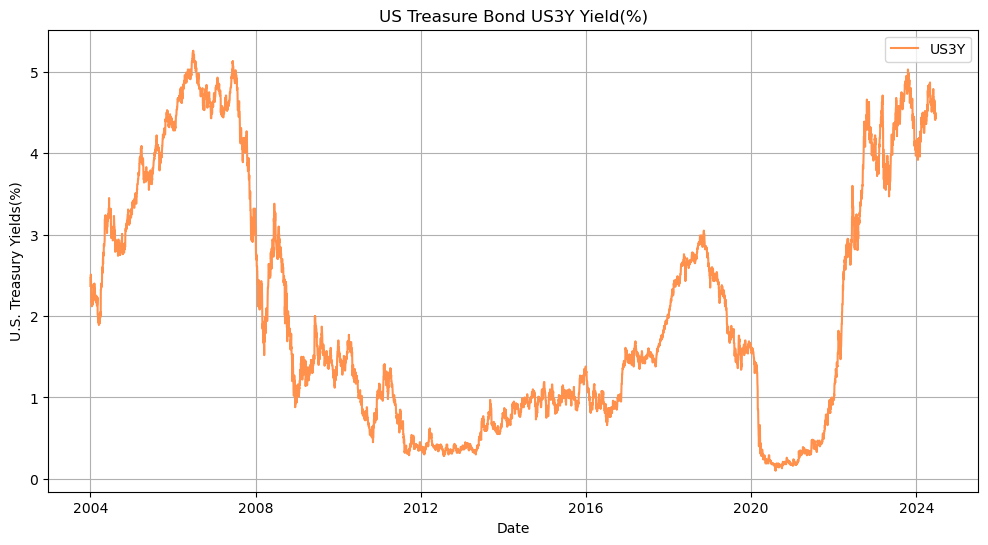

In [9]:
plt.figure(figsize=(12,6))
plt.plot(filtered_data.index, filtered_data.US3Y, label = 'US3Y', color = '#FF914D')
plt.title('US Treasure Bond US3Y Yield(%)')
plt.xlabel('Date')
plt.ylabel('U.S. Treasury Yields(%)')
plt.legend()
plt.grid(True)
plt.show()

## STL Decomposition

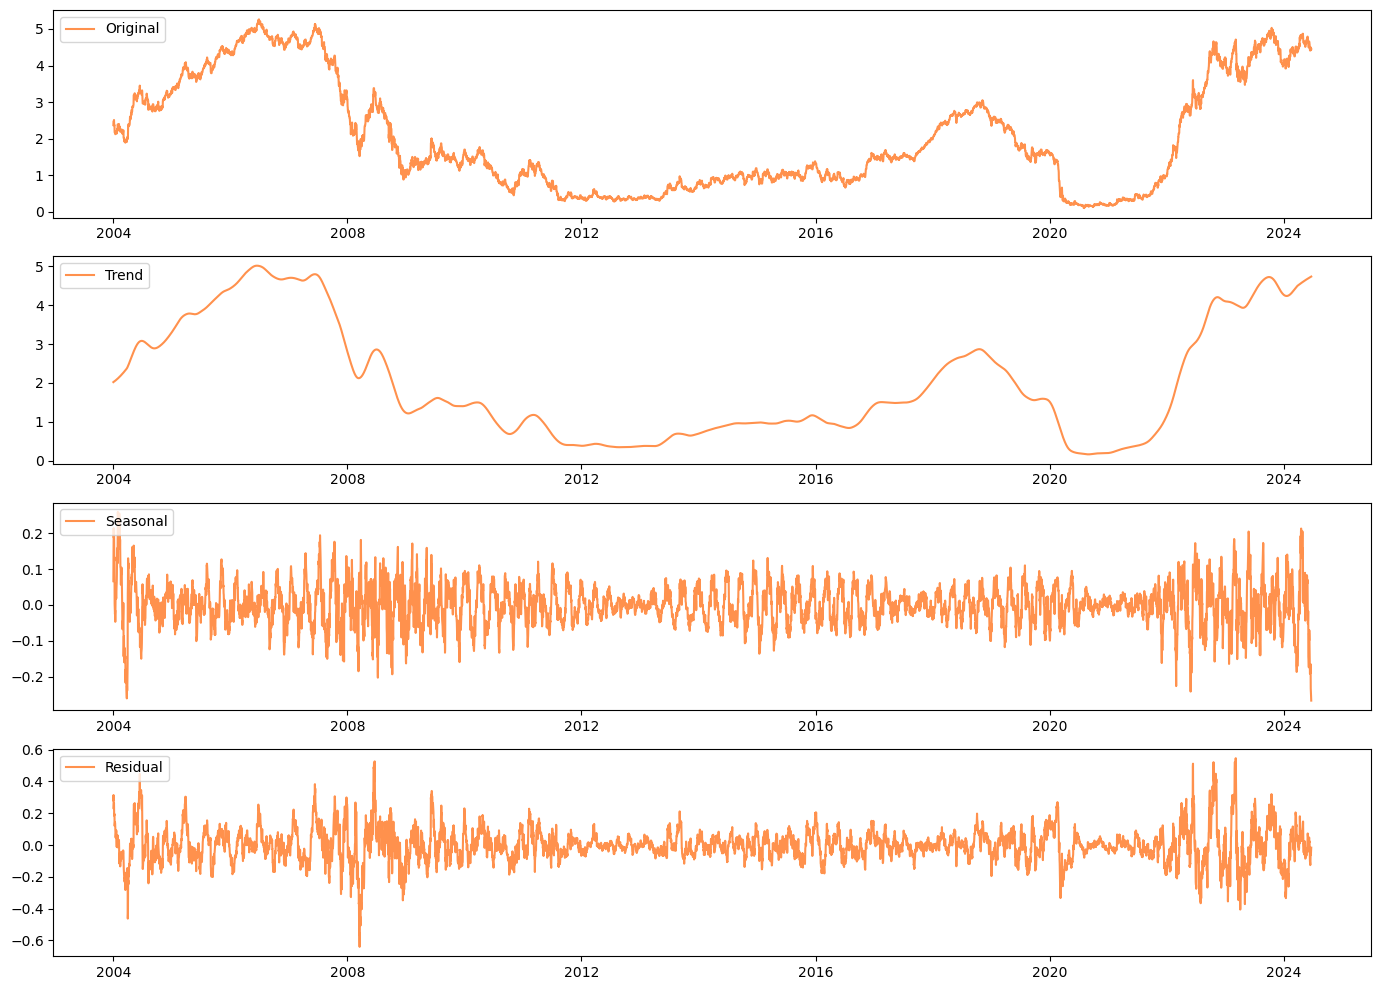

In [10]:
from statsmodels.tsa.seasonal import STL

# perform STL decomposition
stl = STL(filtered_data.US3Y, period=90)
result = stl.fit()

# plot the decomposition components
plt.figure(figsize = (14,10))
plt.subplot(411)
plt.plot(result.observed, label = 'Original', color = '#FF914D')
plt.legend(loc = 'upper left')

plt.subplot(412)
plt.plot(result.trend, label = 'Trend', color = '#FF914D')
plt.legend(loc = 'upper left')

plt.subplot(413)
plt.plot(result.seasonal, label = 'Seasonal', color = '#FF914D')
plt.legend(loc = 'upper left')
plt.subplot(414)
plt.plot(result.resid, label = 'Residual', color = '#FF914D')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

# Stationarity Test

In [11]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(series):
    # Copied from https://machinelearningmastery.com/time-series-data-stationary-python/

    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

In [12]:
check_stationarity(filtered_data.US3Y)

ADF Statistic: -0.874806
p-value: 0.796156
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Non-stationary


# Making Data Stationary

## Differecing method

In [13]:
# first order difference
rate_diff = filtered_data.US3Y.diff()
check_stationarity(rate_diff.dropna())

ADF Statistic: -14.147612
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Stationary


## Transformation - Logarithmic

In [14]:
#log transformation
rate_log = np.log(filtered_data.US3Y.dropna())
check_stationarity(rate_log)

ADF Statistic: -1.520955
p-value: 0.523121
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Non-stationary


## Transformation - Power

In [15]:
#square root transformation
rate_sqrt = np.sqrt(filtered_data.US3Y.dropna())
check_stationarity(rate_sqrt)

ADF Statistic: -1.000075
p-value: 0.753237
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Non-stationary


### Choosing differencing method

In [16]:
# stationary_data = data.US3Y.diff().dropna().to_frame()
stationary_data = rate_diff.dropna().to_frame()

In [17]:
stationary_data.head()

,US3Y
date,
2004-01-02,0.10
2004-01-03,0.00
2004-01-04,0.00
2004-01-05,0.04
2004-01-06,-0.13


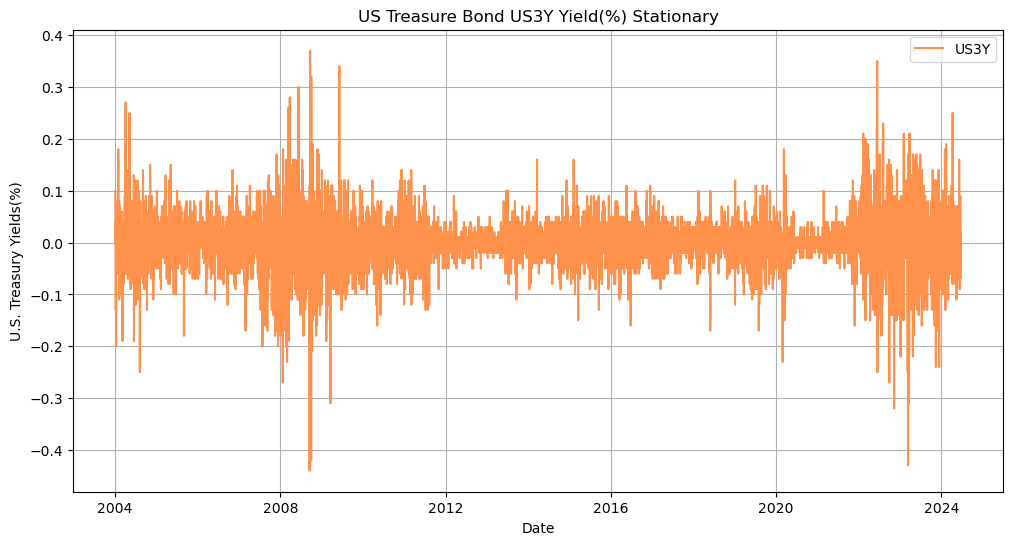

In [18]:
# show stationary data
plt.figure(figsize=(12,6))
plt.plot(stationary_data.index, stationary_data.US3Y, label = 'US3Y', color = '#FF914D')
plt.title('US Treasure Bond US3Y Yield(%) Stationary')
plt.xlabel('Date')
plt.ylabel('U.S. Treasury Yields(%)')
plt.legend()
plt.grid(True)
plt.show()

# Smoothing Data - Not used in Forcasting

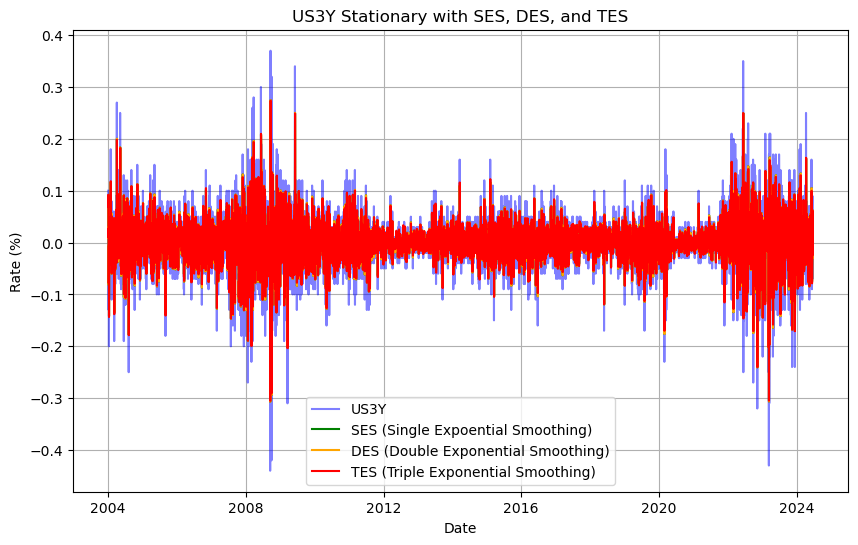

In [19]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

# using differecing method to sta
ses_model = ExponentialSmoothing(stationary_data['US3Y']).fit(smoothing_level = 0.7)
stationary_data['US3Y_SES'] = ses_model.fittedvalues

# Double Exponential Smoothing (DES) - Holt's Linear trend model
des_model = ExponentialSmoothing(stationary_data['US3Y'], trend = 'add').fit(smoothing_level = 0.7)
stationary_data['US3Y_DES'] = des_model.fittedvalues

# # Triple Exponential Smoothing (TES) - Holt's-Winters method
tes_model = ExponentialSmoothing(stationary_data['US3Y'], trend = 'add', seasonal = 'add', seasonal_periods = 12).fit(smoothing_level = 0.7)
stationary_data['US3Y_TES'] = tes_model.fittedvalues


# Plotting
plt.figure(figsize = (10, 6))
plt.plot(stationary_data['US3Y'], label = 'US3Y', color = 'blue', alpha = 0.5)
plt.plot(stationary_data['US3Y_SES'], label = 'SES (Single Expoential Smoothing)', color = 'green')
plt.plot(stationary_data['US3Y_DES'], label = 'DES (Double Exponential Smoothing)', color = 'orange')
plt.plot(stationary_data['US3Y_TES'], label = 'TES (Triple Exponential Smoothing)', color = 'red')

plt.title('US3Y Stationary with SES, DES, and TES')
plt.xlabel('Date')
plt.ylabel('Rate (%)')
plt.legend()
plt.grid()
plt.show()

# ACF and PACF Plot

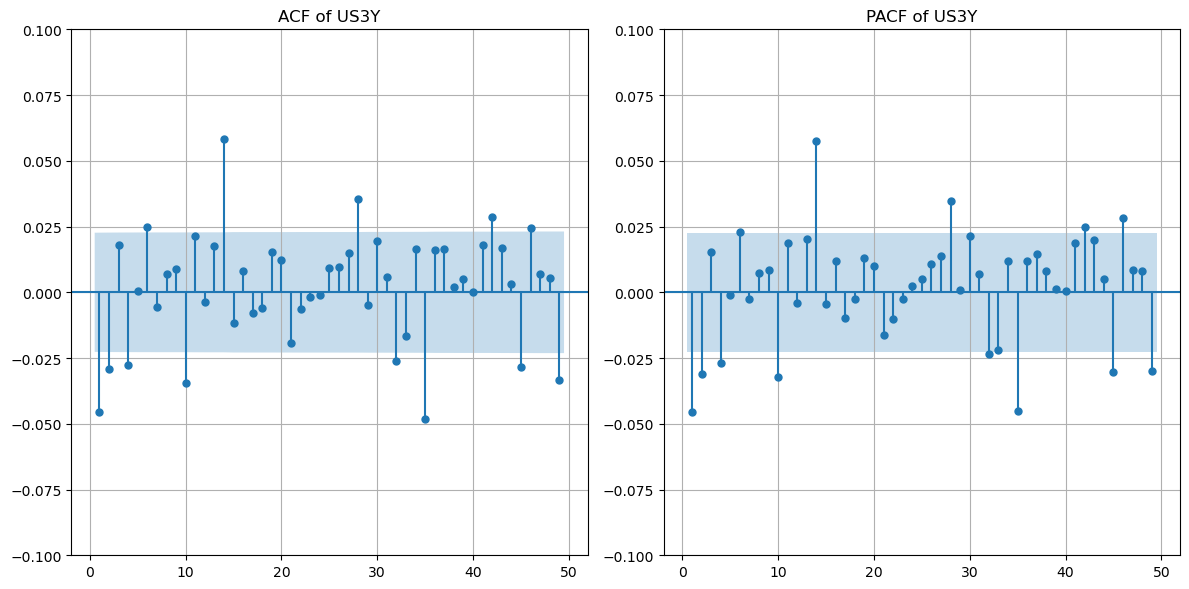

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize = (12, 6))
# ACF Plot
plt.subplot(1, 2, 1)
plot_acf(stationary_data['US3Y'], ax=plt.gca(), lags = range(1, 50))
plt.ylim(-0.1, 0.1)
plt.title('ACF of US3Y')
plt.grid(True)
# PACF Plot
plt.subplot(1, 2, 2)
plot_pacf(stationary_data['US3Y'], ax=plt.gca(), lags = range(1, 50), method = 'ywm')
plt.ylim(-0.1, 0.1)
plt.title('PACF of US3Y')
plt.grid(True)
plt.tight_layout()

plt.show()

p = 1,2 14,28,35, q = 1, 2, 14, d = 1

# Time Series Forecasting Models

### Forecasting Models based on data from 2000-01-01

In [21]:
# take the last 30 days as a test data
train_diff, test_diff = stationary_data['US3Y'][:-30], stationary_data['US3Y'][-30:]
# train_data = stationary_data['US3Y_TES'].iloc[: -int(len(stationary_data) * 0.2)] 
# test_data = stationary_data['US3Y_TES'].iloc[-int(len(stationary_data) * 0.2):] 

test_previous = filtered_data['US3Y'][-30:]

## AR Model

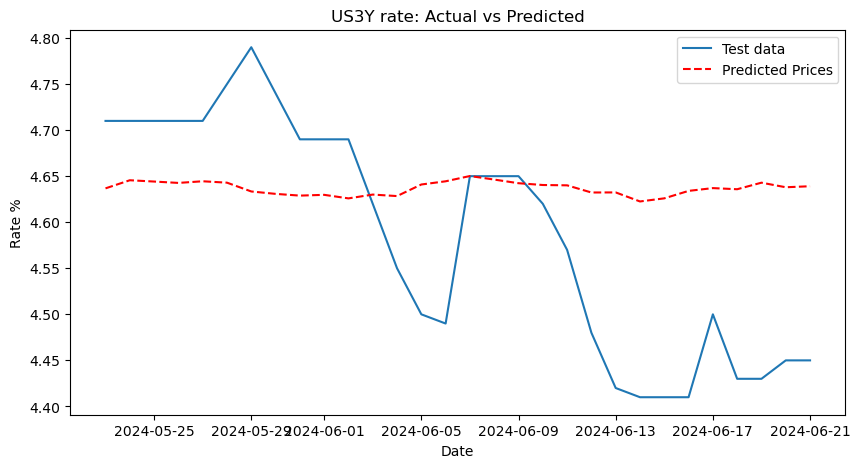

RMSE:  0.13232
Akaike Information Criterion (AIC): -24812.38633204815
Bayesian Information Criterion (BIC) -24487.639572939683


In [22]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

# Fit the Autoregressive model (AR) to the training data
model = AutoReg(train_diff, lags = 45)
model_fit = model.fit()

# Make predictions on the test data
pred_diff = model_fit.predict(
    start = len(train_diff),
    end = len(train_diff) + len(test_diff)-1,
    dynamic=False)

# revert prediction to actual values
test_original = pred_diff.cumsum() + filtered_data['US3Y'][-31]

# Plot the actual vs predicted values
plt.figure(figsize = (10, 5))
plt.plot(test_diff.index, test_previous, label = 'Test data')
plt.plot(test_diff.index, test_original, color = 'red', linestyle = '--', label = 'Predicted Prices')
plt.title('US3Y rate: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Rate %')
plt.legend()
plt.show()

# evaluating model using RMSE score
rmse = round(np.sqrt(mean_squared_error(test_previous, test_original)), 5)
print('RMSE: ', rmse)

# aic and bic
aic = model_fit.aic
bic = model_fit.bic

print(f'Akaike Information Criterion (AIC): {aic}')
print(f'Bayesian Information Criterion (BIC) {bic}')

## MA

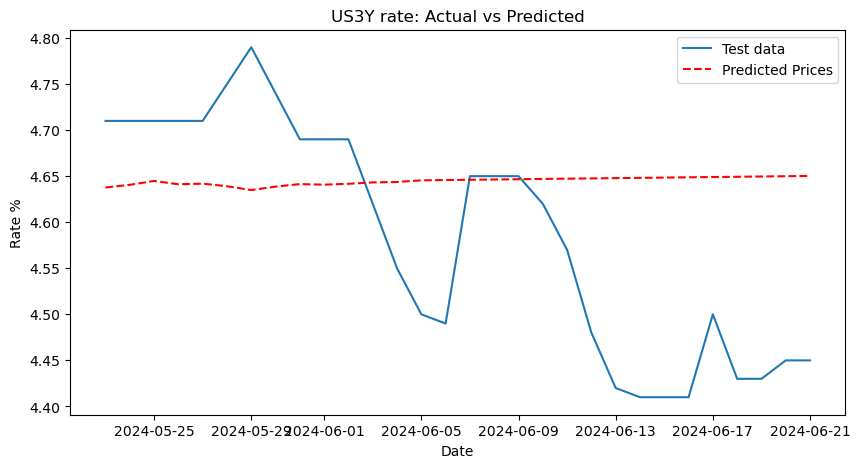

RMSE:  0.14002


In [23]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the Moving Average (MA) model to the training data
model = ARIMA(train_diff, order=(0, 0, 14))
model_fit = model.fit()

# Make predictions on the test data
pred_diff = model_fit.predict(
    start = len(train_diff),
    end = len(train_diff) + len(test_diff) - 1,
    dynamic = False)

# revert prediction to actual values
test_original = pred_diff.cumsum() + filtered_data['US3Y'][-31]
# Plot the actual vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(test_diff.index, test_previous, label='Test data')
plt.plot(test_diff.index, test_original, color = 'red', linestyle = '--', label = 'Predicted Prices')
plt.title('US3Y rate: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Rate %')
plt.legend()
plt.show()

# evaluating model using RMSE score
rmse = round(np.sqrt(mean_squared_error(test_previous, test_original)), 5)
print('RMSE: ', rmse)

## ARIMA

C:\Users\Mason\anaconda3\envs\py39\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


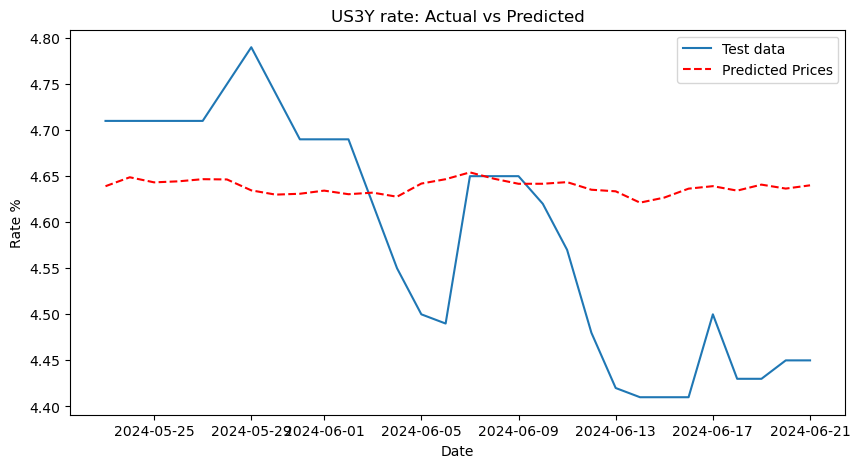

RMSE:  0.13223


In [24]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the Moving Average (MA) model to the training data
model = ARIMA(train_diff, order=(45, 0, 14))
model_fit = model.fit()

# Make predictions on the test data
pred_diff = model_fit.predict(
    start = len(train_diff),
    end = len(train_diff) + len(test_diff) - 1,
    dynamic = False)

# revert prediction to actual values
test_original = pred_diff.cumsum() + filtered_data['US3Y'][-31]
# Plot the actual vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(test_diff.index, test_previous, label='Test data')
plt.plot(test_diff.index, test_original, color = 'red', linestyle = '--', label = 'Predicted Prices')
plt.title('US3Y rate: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Rate %')
plt.legend()
plt.show()

# evaluating model using RMSE score
rmse = round(np.sqrt(mean_squared_error(test_previous, test_original)), 5)
print('RMSE: ', rmse)